In [1]:
# libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import datetime

# import time series
from google.colab import files
import io

In [2]:
# upload
uploaded = files.upload()
timeseries = pd.read_csv('TimeSeriesExport.csv')

Saving TimeSeriesExport.csv to TimeSeriesExport.csv


In [3]:
# remove unneeded columns 

# Data type all the same, remove
# timeseries['Data Type'].unique()
del timeseries['Data Type']

# HTS number all the same, remove
# timeseries['HTS Number'].unique()
del timeseries['HTS Number']

# Description all the same, remove
# timeseries['Description'].unique()
del timeseries['Description']

# Quantity Desc all the same, remove
# timeseries['Quantity Description'].unique()
del timeseries['Quantity Description']

# Leave in this category
# timeseries['Special Import Program'].unique()


In [4]:
# preview
timeseries.head(5)

,Year,Country,Special Import Program,Rate Provision Code,District,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,2017.0,Australia,No program claimed,00 - Free into bonded warehouse or FTZ,"Miami, FL",0,0,0,0,0,0,0,0,0,0,0,0
1,2017.0,Australia,No program claimed,00 - Free into bonded warehouse or FTZ,"New York, NY",0,0,0,0,0,0,0,0,0,0,0,0
2,2017.0,Australia,No program claimed,00 - Free into bonded warehouse or FTZ,"San Francisco, CA",0,0,0,0,0,0,0,0,0,0,0,0
3,2017.0,Australia,No program claimed,10 - Free under HS Chapters 1-98,"Chicago, IL",0,0,0,0,0,0,0,0,0,0,"122,146",0
4,2017.0,Australia,No program claimed,10 - Free under HS Chapters 1-98,"Cleveland, OH",0,0,0,0,0,0,"171,024",0,0,0,0,0


In [5]:
# subset the data to only include the United Kingdom imports - this is where Scotland is located
# interested in seeing imports from UK to USA
timeseries_uk = timeseries[timeseries['Country'] == "United Kingdom"]

In [6]:
# preview shape
timeseries_uk.shape

(413, 17)

In [7]:
# preview df
timeseries_uk.head(5)

,Year,Country,Special Import Program,Rate Provision Code,District,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
240,2017.0,United Kingdom,No program claimed,00 - Free into bonded warehouse or FTZ,"Baltimore, MD",0,0,0,0,0,0,0,0,0,0,0,0
241,2017.0,United Kingdom,No program claimed,00 - Free into bonded warehouse or FTZ,"Charlotte, NC",0,0,0,0,0,0,0,0,0,0,0,0
242,2017.0,United Kingdom,No program claimed,00 - Free into bonded warehouse or FTZ,"Chicago, IL",0,0,0,0,0,0,0,0,0,0,0,0
243,2017.0,United Kingdom,No program claimed,00 - Free into bonded warehouse or FTZ,"Cleveland, OH",0,0,0,0,0,0,0,0,0,0,0,0
244,2017.0,United Kingdom,No program claimed,00 - Free into bonded warehouse or FTZ,"Columbia-Snake, OR",0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# what are the datatypes
timeseries_uk.dtypes

Year                      float64
Country                    object
Special Import Program     object
Rate Provision Code        object
District                   object
JAN                        object
FEB                        object
MAR                        object
APR                        object
MAY                        object
JUN                        object
JUL                        object
AUG                        object
SEP                        object
OCT                        object
NOV                        object
DEC                        object
dtype: object

In [9]:
# Year needs to be int instead of float
timeseries_uk['Year'] = timeseries_uk['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# JAN - DEC needs to be a int instead of an object
# remove the , 
timeseries_uk['JAN'] = timeseries_uk['JAN'].str.replace(',','')
timeseries_uk['FEB'] = timeseries_uk['FEB'].str.replace(',','')
timeseries_uk['MAR'] = timeseries_uk['MAR'].str.replace(',','')
timeseries_uk['APR'] = timeseries_uk['APR'].str.replace(',','')
timeseries_uk['MAY'] = timeseries_uk['MAY'].str.replace(',','')
timeseries_uk['JUN'] = timeseries_uk['JUN'].str.replace(',','')
timeseries_uk['JUL'] = timeseries_uk['JUL'].str.replace(',','')
timeseries_uk['AUG'] = timeseries_uk['AUG'].str.replace(',','')
timeseries_uk['SEP'] = timeseries_uk['SEP'].str.replace(',','')
timeseries_uk['OCT'] = timeseries_uk['OCT'].str.replace(',','')
timeseries_uk['NOV'] = timeseries_uk['NOV'].str.replace(',','')
timeseries_uk['DEC'] = timeseries_uk['DEC'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# timeseries_uk['NOV'] = timeseries_uk['NOV'].str.replace('NONE', )
# timeseries_uk['DEC'] = timeseries_uk['DEC'].str.replace('NONE', )

In [11]:
# first convert from None to NAN
timeseries_uk ['NOV']= timeseries_uk['NOV'].replace('None', np.nan).astype(float)
timeseries_uk ['DEC']= timeseries_uk['DEC'].replace('None', np.nan).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# convert from NAN to 0
# timeseries_uk['NOV'] = timeseries_uk['NOV'].fillna(value = 0, inplace = True)
timeseries_uk = timeseries_uk.fillna(0)

In [13]:
# convert object to int
timeseries_uk['JAN'] = timeseries_uk['JAN'].astype(int)
timeseries_uk['FEB'] = timeseries_uk['FEB'].astype(int)
timeseries_uk['MAR'] = timeseries_uk['MAR'].astype(int)
timeseries_uk['APR'] = timeseries_uk['APR'].astype(int)
timeseries_uk['MAY'] = timeseries_uk['MAY'].astype(int)
timeseries_uk['JUN'] = timeseries_uk['JUN'].astype(int)
timeseries_uk['JUL'] = timeseries_uk['JUL'].astype(int)
timeseries_uk['AUG'] = timeseries_uk['AUG'].astype(int)
timeseries_uk['SEP'] = timeseries_uk['SEP'].astype(int)
timeseries_uk['OCT'] = timeseries_uk['OCT'].astype(int)
timeseries_uk['NOV'] = timeseries_uk['NOV'].astype(int)
timeseries_uk['DEC'] = timeseries_uk['DEC'].astype(int)

In [14]:
# what are the datatypes
timeseries_uk.dtypes

Year                       int64
Country                   object
Special Import Program    object
Rate Provision Code       object
District                  object
JAN                        int64
FEB                        int64
MAR                        int64
APR                        int64
MAY                        int64
JUN                        int64
JUL                        int64
AUG                        int64
SEP                        int64
OCT                        int64
NOV                        int64
DEC                        int64
dtype: object

In [15]:
# preview
timeseries_uk.tail()

,Year,Country,Special Import Program,Rate Provision Code,District,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1725,2021,United Kingdom,No program claimed,"69 - Dutiable- HS chapter 99, duty reported","San Juan, PR",287510,356456,715738,0,0,0,0,0,0,0,0,0
1726,2021,United Kingdom,No program claimed,"69 - Dutiable- HS chapter 99, duty reported","Savannah, GA",217774,207204,239264,0,0,0,0,0,0,0,0,0
1727,2021,United Kingdom,No program claimed,"69 - Dutiable- HS chapter 99, duty reported","Seattle, WA",91762,131574,0,0,0,0,0,0,0,0,0,0
1728,2021,United Kingdom,No program claimed,"69 - Dutiable- HS chapter 99, duty reported","St. Louis, MO",1197150,1315602,134496,0,0,0,0,0,0,0,0,0
1729,2021,United Kingdom,No program claimed,"79 - Dutiable HS Chapter 99, no duty reported","New York, NY",166710,257978,0,0,0,0,0,0,0,0,0,0


In [16]:
# collapse by year
ts_uk_collapsed = timeseries_uk.groupby('Year').sum()

In [17]:
# reset the index
ts_uk_collapsed = ts_uk_collapsed.reset_index()

In [18]:
# preview
ts_uk_collapsed

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,2017,207455508,189967504,242805884,253062352,264301332,354603638,240111362,211816638,341079228,355625934,351249562,415254464
1,2018,192857346,182544548,204812116,298591414,322469064,335721198,243416362,253009634,322007578,434081568,379074708,387036300
2,2019,256608300,254533218,287144690,335905734,396223160,333901336,274537746,299576506,373209844,430573920,275789008,239777376
3,2020,184864044,122414208,248435432,248133822,182648496,172930842,198792400,275180488,231649032,244111038,232099098,170301328
4,2021,158236302,99036408,183423580,196087108,221158290,241268434,184250030,170624438,218876796,231108810,0,0


In [21]:
# check for max values 
max_per_row = ts_uk_collapsed.max(axis=1)
max_per_row

0    415254464
1    434081568
2    430573920
3    275180488
4    241268434
dtype: int64

In [22]:
# change the columns to month ints
ts_uk_collapsed.rename(columns={'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}, inplace = True)

In [23]:
# make this long
ts_uk_long = ts_uk_collapsed.melt(id_vars = 'Year')

In [24]:
# rename columns
ts_uk_long.rename(columns = {'variable':'Month'}, inplace = True)

In [25]:
# add a column for day - using 1 for the entire column 
ts_uk_long['Day'] = 1

In [26]:
# get a date column
cols=["Year","Month","Day"]
ts_uk_long['ds'] = ts_uk_long[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [27]:
# preview
ts_uk_long.head()

,Year,Month,value,Day,ds
0,2017,1,207455508,1,2017-1-1
1,2018,1,192857346,1,2018-1-1
2,2019,1,256608300,1,2019-1-1
3,2020,1,184864044,1,2020-1-1
4,2021,1,158236302,1,2021-1-1


In [28]:
# check on dtypes - ds is an object
# ts_uk_long.dtypes
ts_uk_long['ds']=pd.to_datetime(ts_uk_long['ds'])

In [29]:
# ts_uk_long.dtypes

In [30]:
# take a look at the final dataframe for time series
final_df = ts_uk_long[['ds', 'value']]

In [31]:
# rename value to y
final_df.rename(columns = {'value':'y'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
# take a look
final_df.head()

,ds,y
0,2017-01-01,207455508
1,2018-01-01,192857346
2,2019-01-01,256608300
3,2020-01-01,184864044
4,2021-01-01,158236302


In [ ]:
# remove Nov and Dec 2021 since we dont have that data
# final_df.tail(10)

,ds,y
50,2017-11-01,351249562
51,2018-11-01,379074708
52,2019-11-01,275789008
53,2020-11-01,232099098
54,2021-11-01,0
55,2017-12-01,415254464
56,2018-12-01,387036300
57,2019-12-01,239777376
58,2020-12-01,170301328
59,2021-12-01,0


In [33]:
# remove Nov and Dec 2021 since we dont have that data
final_df = final_df.drop(54)
final_df = final_df.drop(59)

In [34]:
# preview
final_df.tail(10)

,ds,y
48,2020-10-01,244111038
49,2021-10-01,231108810
50,2017-11-01,351249562
51,2018-11-01,379074708
52,2019-11-01,275789008
53,2020-11-01,232099098
55,2017-12-01,415254464
56,2018-12-01,387036300
57,2019-12-01,239777376
58,2020-12-01,170301328


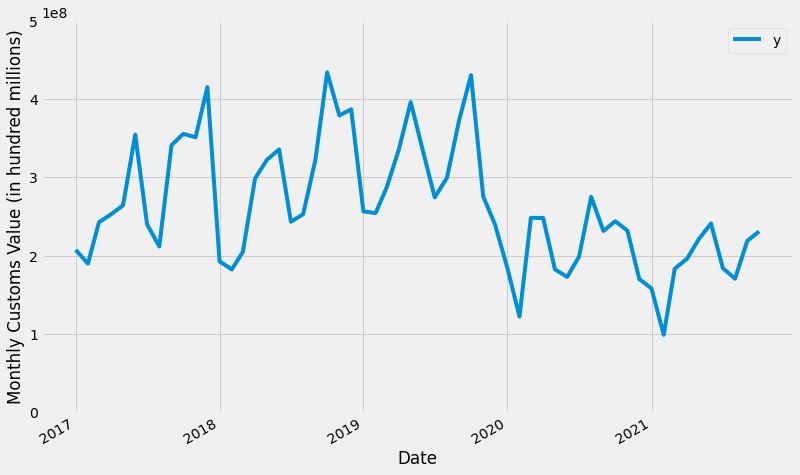

In [35]:
plt.style.use('fivethirtyeight')

ax = final_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Customs Value (in hundred millions)')
ax.set_xlabel('Date')
# ax.set_yticks(np.arange(0, 1000000, 5000000)) # setting the ticks
# plt.xlim([2017, 2021])
plt.ylim(0, 500000000)

plt.show()

In [36]:
from fbprophet import Prophet

In [37]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(final_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
66,2022-06-30
67,2022-07-31
68,2022-08-31
69,2022-09-30
70,2022-10-31


In [39]:
forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
66,2022-06-30,1.695804e+07,-5.829890e+07,9.345137e+07
67,2022-07-31,9.520036e+06,-6.074750e+07,8.139953e+07
68,2022-08-31,2.114575e+08,1.325196e+08,2.832508e+08
69,2022-09-30,3.801218e+08,3.069474e+08,4.550654e+08
70,2022-10-31,1.272247e+08,5.595344e+07,2.014233e+08


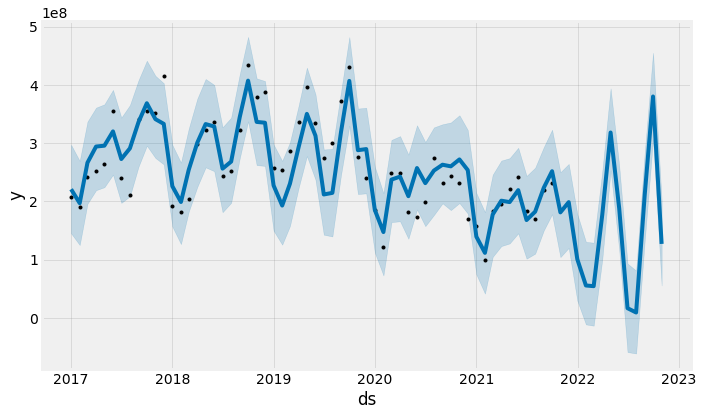

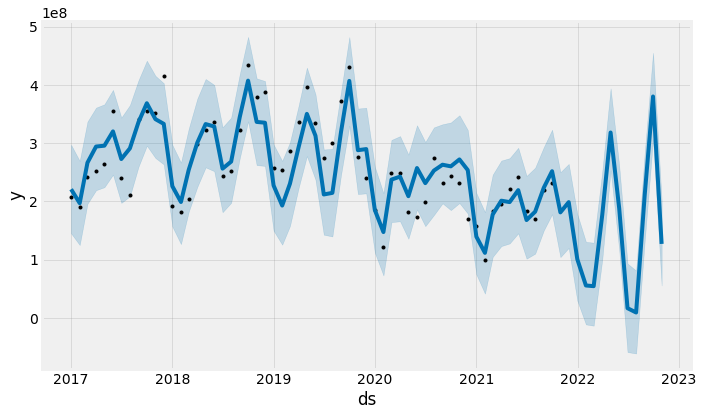

In [40]:
# MODEL
bev_model.plot(forecast, uncertainty=True)

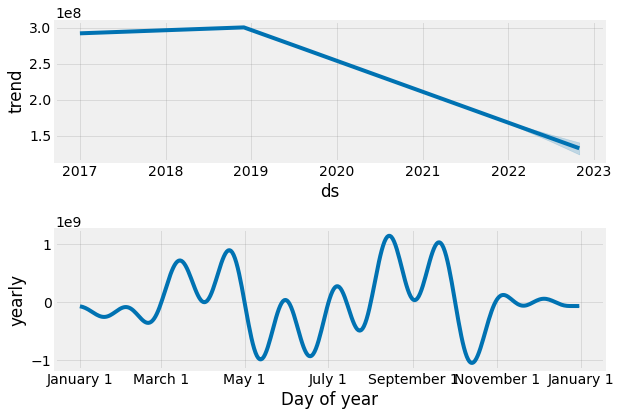

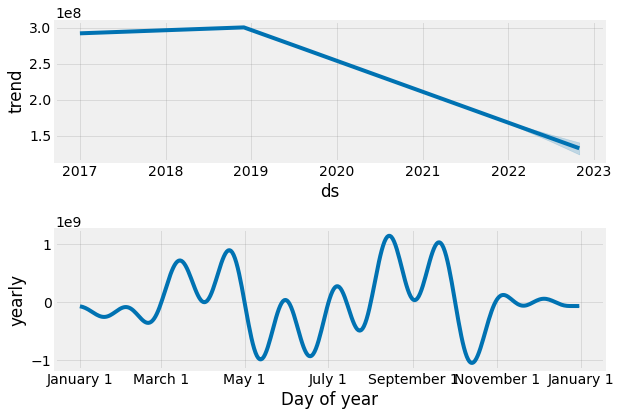

In [41]:
bev_model.plot_components(forecast)